<a href="https://colab.research.google.com/github/karsarobert/NLP_2024/blob/main/10/NLP2024_10_FELADATOKKAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Természetes nyelvfeldolgozás
# PTE Gépi tanulás III.

## 10. Gyakorlat, multimodális modellek
### 2024. április 24.


![img](https://blog.roboflow.com/content/images/2024/04/image-1207.webp)

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git@f8c5301435833e30acb7605317bd95eeb46798b0
!pip install -q accelerate
!pip install -q -i https://pypi.org/simple/ bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.2 MB/s eta 0:00:00


In [ ]:
import requests
import torch
from PIL import Image

from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image
from transformers import BitsAndBytesConfig

DEVICE = "cuda:0"

quantization_config = BitsAndBytesConfig(load_in_4bit=True)
processor = AutoProcessor.from_pretrained("HuggingFaceM4/idefics2-8b", do_image_splitting=False)
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceM4/idefics2-8b",
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
)


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.64G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/4.25G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

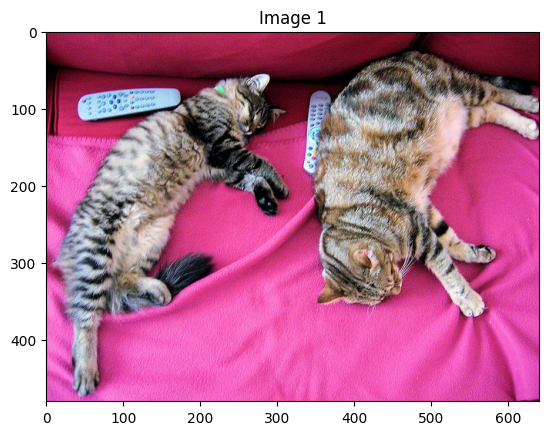

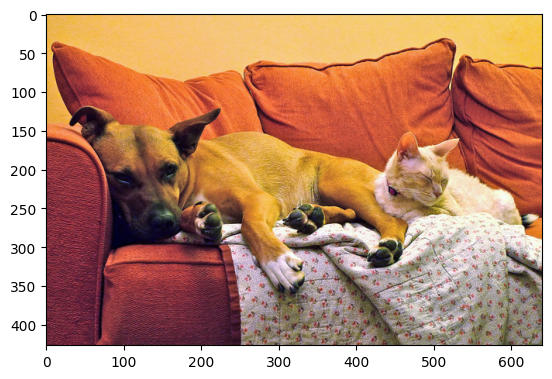

In [ ]:
import matplotlib.pyplot as plt

url_1 = "http://images.cocodataset.org/val2017/000000039769.jpg"
url_2 = "http://images.cocodataset.org/val2017/000000219578.jpg"

image_1 = Image.open(requests.get(url_1, stream=True).raw)
image_2 = Image.open(requests.get(url_2, stream=True).raw)
images = [image_1, image_2]

messages = [{
    "role": "user",
    "content": [
        {"type": "text", "text": "What’s the difference between these two images?"},
        {"type": "image"},
        {"type": "image"},
    ],
}]



plt.imshow(image_1)
plt.title("Image 1")
plt.show()

plt.imshow(image_2)
plt.show()

In [ ]:
text = processor.apply_chat_template(messages)
# "User: What’s the difference between these two images?<image><image><end_of_utterance>\n"
print(text)


prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image_1, image_2], return_tensors="pt")
inputs = {k: v.to(DEVICE) for k, v in inputs.items()}
generated_ids = model.generate(**inputs, max_new_tokens=500)
generated_texts = processor.batch_decode(generated_ids, skip_special_tokens=True)

User: What’s the difference between these two images?<image><image><end_of_utterance>



In [ ]:
generated_texts[0]

'User: What’s the difference between these two images? \nAssistant: The first image has two cats while the second image has a cat and a dog.'

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

https://i.ytimg.com/vi/4cXcLQERrOw/sddefault.jpg

https://assets.4cdn.hu/kraken/7mwiYpxqTi6BHkBxs-xl.jpeg

https://egerhirek.hu/wp-content/uploads/2019/08/handicap-400x240.jpg


https://cam.idokep.hu/kamera.php?user=magyarszek&token=a4b71769c8f4cf0fdb96a299d5c418dd&t=171389276924054

https://live.onlinecamera.net/186-fast.html
https://live.onlinecamera.net/186koszegjurisicseredetimeret.jpg?time=1713894287546

https://live.onlinecamera.net/37kapuvareredetimeret.jpg

#Feladat

Készítsen egy kis alkalmazást ami egy webkamera képét beolvassa, megszámolja a képen található autókat és az eredményt és az aktuális időt egy dataframe-be másolja. Majd a az eredményekből egy grafikont rajzol.